# <center>Filters, Contrast, Transformation and Morphology</center>

# libraries

In [1]:
from skimage import color, data, filters , measure
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def plot_comparison(original, filtered, title_filtered,title_original='original'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10), sharex=True,
    sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title(title_original)
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [4]:
def plot_contrast(org_image,eq_image):
    fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(8, 8))
    ax[0,0].imshow(org_image,cmap=plt.cm.gray)
    ax[0,0].set_title('original')
    ax[0,0].axis('off')

    ax[0,1].hist(org_image.ravel(), bins=256)
    ax[0,1].set_title('Histogram of image')


    # Show the resulting image
    ax[1,0].imshow(eq_image,cmap=plt.cm.gray)
    ax[1,0].set_title('after costrast by equalization')
    ax[1,0].axis('off')

    ax[1,1].hist(eq_image.ravel(), bins=256)
    ax[1,1].set_title('Equalization Histogram')

# Filters
## uses of filter
- Enhancing an image
- Emphasize or remove features
- Smoothing
- Sharpening
- Edge detection

## Edge detection

### Sobel filter
detect edges in an image by applying the Sobel filter. 

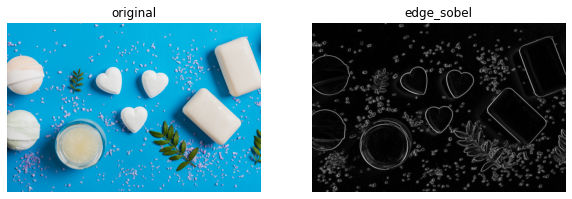

In [7]:
# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image=plt.imread('./images/chapter2/soaps_image.jpg')
soaps_imagegray= color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_imagegray)

# Show original and resulting image to compare
plot_comparison(soaps_image,edge_sobel,"edge_sobel")

## Smoothing
### Guassian filter
Guassian filter is blurring the image and removing the noise. 

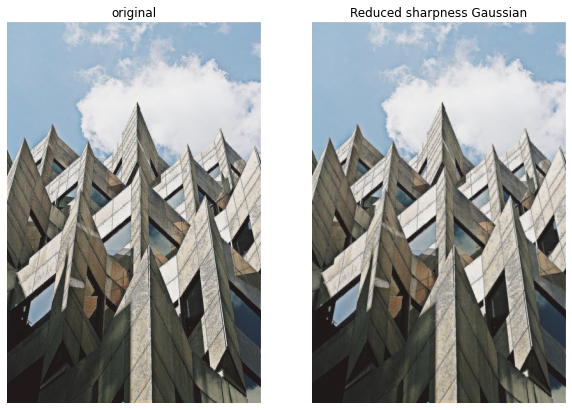

In [8]:
# reduce the sharpness of an image of a building 

# Import Gaussian filter 
from skimage.filters import gaussian

building_image=plt.imread('./images/chapter2/building_image.jpg')
# Apply filter
gaussian_image = gaussian(building_image,multichannel=True) #multichannel=True if image colored

# Show original and resulting image to compare
plot_comparison(building_image,gaussian_image,"Reduced sharpness Gaussian")

# Transformations
## Rotate

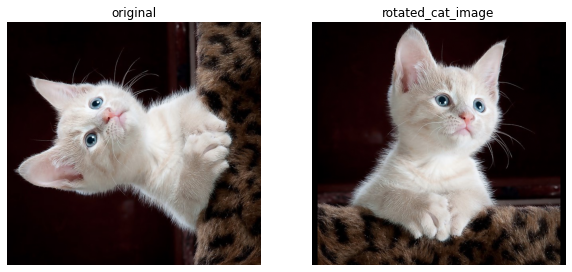

In [9]:
image_cat=plt.imread('./images/chapter2/image_cat.jpg')

# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

plot_comparison(image_cat,rotated_cat_image,"rotated_cat_image")

## Rescale

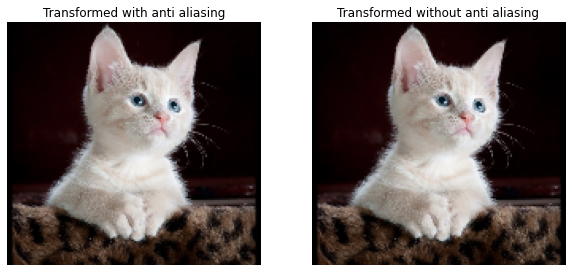

In [10]:
# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
plot_comparison(rescaled_with_aa,rescaled_without_aa,
                "Transformed without anti aliasing","Transformed with anti aliasing")

### Enlarge

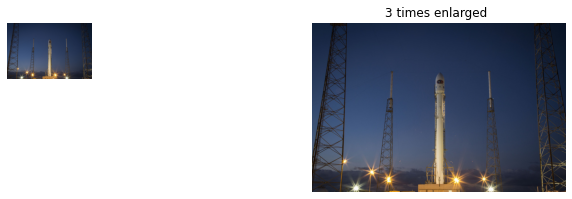

In [11]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image,3,  anti_aliasing=True, multichannel=True)

# Show original and resulting image
plot_comparison(rocket_image,enlarged_rocket_image,"3 times enlarged "," ")

## Resize

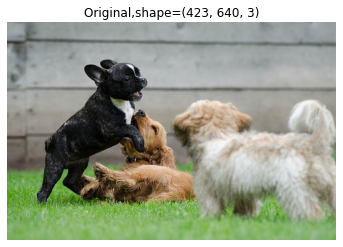

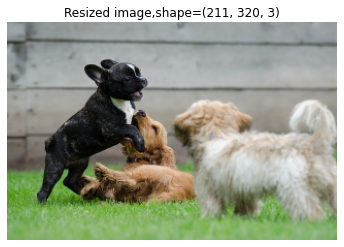

In [12]:
dogs_banner=plt.imread('./images/chapter2/dogs_banner.jpg')

# Import the module and function
from skimage.transform import resize
# Set proportional height so its half its size
height = int( dogs_banner.shape[0] / 2)
width = int( dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner,(height, width),
                       anti_aliasing=True)

# Show the original and resized image
show_image(dogs_banner, f'Original,shape={dogs_banner.shape}')
show_image(image_resized, f'Resized image,shape={image_resized.shape}')

# Morphology
## Erosion

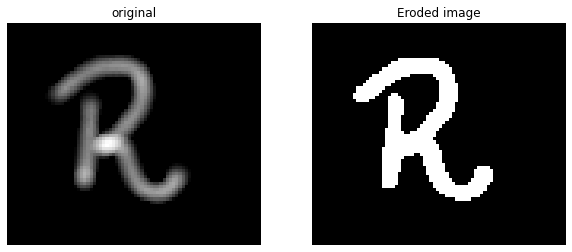

In [13]:
upper_r_image=rgb2gray(plt.imread('./images/chapter2/r5.png'))

# Import the morphology module
from skimage import morphology

# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(upper_r_image)

# See results
plot_comparison(upper_r_image,eroded_image_shape, 'Eroded image')

## Dilation

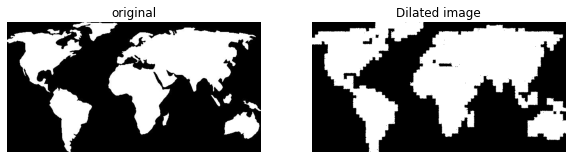

In [14]:
world_image=rgb2gray(plt.imread('./images/chapter2/world_image_binary.jpg'))
# Import the module
from skimage import morphology

# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)

# See results
plot_comparison(world_image,dilated_image, 'Dilated image')

----------------------------------------------------------------------------------------------
# Contrast enhancement

- **why Contrast enhancement?**
    - Image enhancement can be extremely useful in multiple areas.
    - Often medical images like this X-ray can have low contrast, making it hard to spot important details. When we improve the contrast,the details become more visible. It's definitely easier to spot things on this one!


- **Contrast**
    - The contrast is the measure of the spread of histogram (the dynamic range).
    - The contrast is the difference between the maximum and minimum pixel intensity in the image. 
    - low contrast image has small difference between its dark and light pixel values.
    - usually skewed either to the right (being mostly light)
    - to the left (when is mostly dark)
    - located around the middle (mostly gray).


- **Enhance contrast**
    - We can enhance contrast through **contrast stretching** which is used to **stretch the histogram so the full range** of intensity values of the image is filled.
    - **histogram equalization**, that **spreads out the most frequent histogram intensity** values using probability distribution. 


- **three types of histogram equalization**
    1. The standard
    2. the adaptive
    3. the limited adaptive


- In scikit-image we can apply standard histogram equalization, contrast stretching, and contrast limited adaptive as we can see in these images.

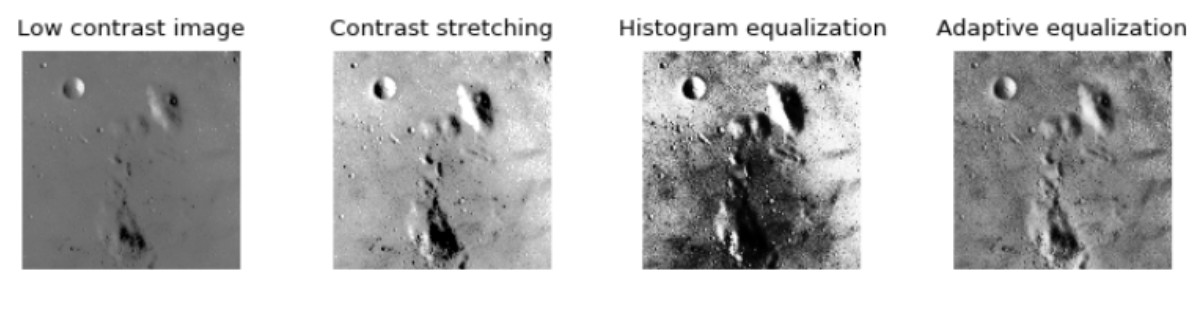

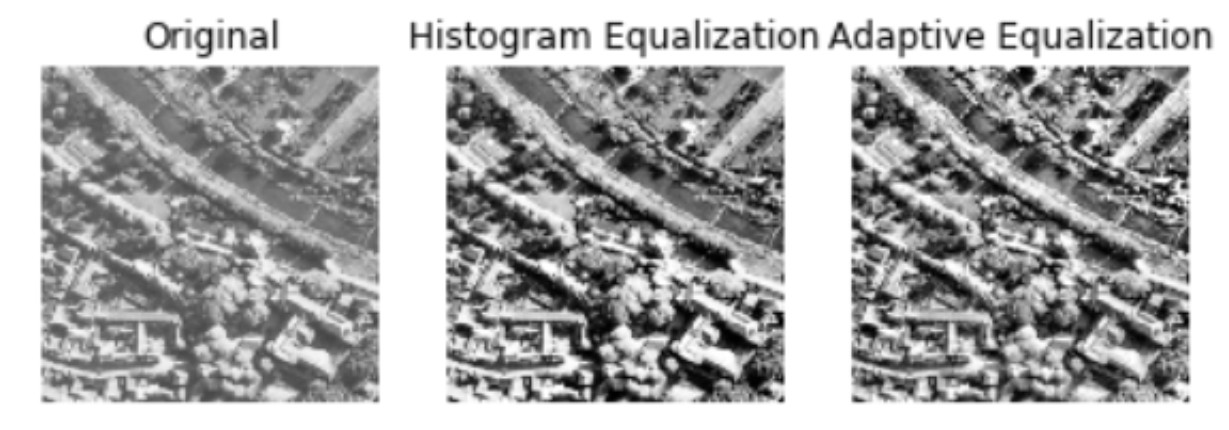

- We get a result that applying Histogram equalization, despite the increased contrast, doesn't look natural. In fact, it doesn't even look like the image has been enhanced at all.
- But if you look closer and compare the results, you will see that the adaptive method is not that intense, so it looks more natural.    
> import the exposure module from scikit-image for all equalization methods.

## Histogram equalization
- Histogram equalization spreads out the most frequent intensity values.


trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details.

In [15]:
chest_xray_image=plt.imread('./images/chapter2/chest_xray_image.png')

# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

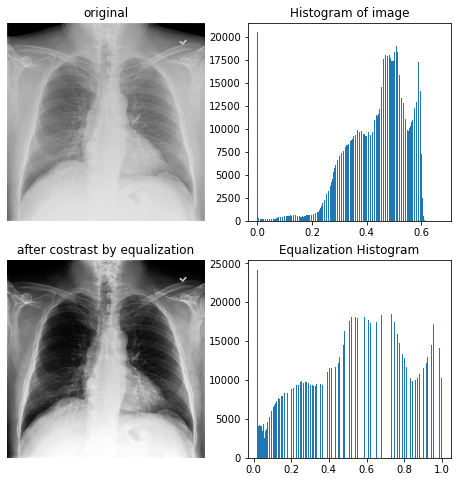

In [16]:
plot_contrast(chest_xray_image,xray_image_eq)

-------------------------------------------------------------------------------------------
we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it. 

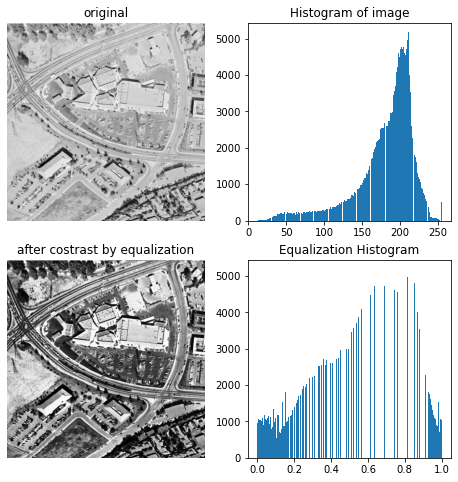

In [17]:
image_aerial=plt.imread('./images/chapter2/image_aerial.tiff')

# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq =exposure.equalize_hist(image_aerial)

plot_contrast(image_aerial,image_eq)

##  Adaptive Histogram Equalization
- **Adaptive Equalization**
    - Another type of histogram equalization is the adaptive one.
    - This method computes several histograms, each corresponding to a distinct part of the image, and uses them to redistribute the lightness values of the image histogram. 
    - A type of this method is the **Contrastive Limited Adaptive Histogram Equalization(CLAHE)** which was developed to **prevent over-amplification of noise*** that adaptive histogram equalization can give rise to. 
    
    
- **CLAHE (Contrastive Limited Adaptive Equalization)**
    - This is because it is not taking the global histogram of the entire image, but operates on small regions called tiles or neighborhoods.
    - It calculates the contrast transform function for each tile individually.
    - We pass the original image as first parameter and a clip_limit.
    - This clipping limit, is normalized between 0 and 1 (higher values give more contrast).

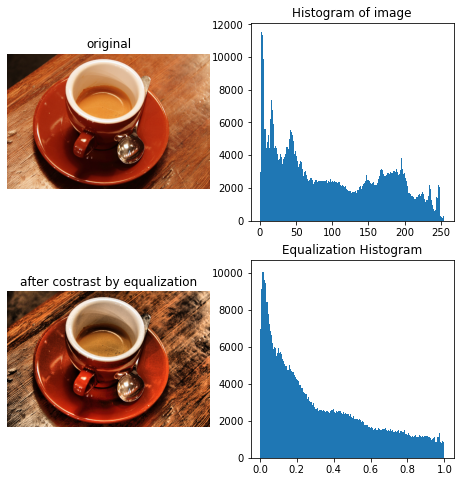

In [18]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

plot_contrast(original_image,adapthist_eq_image)